### Import Libraries

In [117]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud
from IPython.display import display, HTML

# Loads pretrained models for tokenization
nltk.download('punkt')
# Loads pretrained models for part-of-speech tagging
nltk.download('averaged_perceptron_tagger')
# Stopwords are words that are frequently occurring in a language but do not carry significant meaning on their own in the context of text analysis, 
# such as "the", "a", "an", "in", "on", "of", etc. 
nltk.download("stopwords")
# WordNet is a lexical database designed to mimic the human lexical memory. It organizes English words into sets of Synonyms (Synsets), Antonyms, Hypernyms ...
nltk.download('wordnet')

warnings.filterwarnings("ignore")
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rakes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rakes\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rakes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rakes\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<!--  -->

### Sample Data

In [81]:
df = pd.DataFrame({"Restuarant_Reviews": ["Food taste is good :-)", 
                                        "Food taste is bad :-(",
                                        "Food served late.",
                                        "Food is good, but price is expensive.", 
                                        "Staff are not friendly"]})

In [82]:
display(HTML(df.to_html()))
df.info()

,Restuarant_Reviews
0,Food taste is good :-)
1,Food taste is bad :-(
2,Food served late.
3,"Food is good, but price is expensive."
4,Staff are not friendly


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Restuarant_Reviews  5 non-null      object
dtypes: object(1)
memory usage: 172.0+ bytes


<!--  -->

### Preprocessing

<!--  -->

#### Step 1: Removing Special Characters and Symbols from String

In [83]:
def clean_text(text):
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

df["Cleaned_Data"] = df["Restuarant_Reviews"].apply(clean_text)

# Data Overview
display(HTML(df.to_html()))
df.info()

,Restuarant_Reviews,Cleaned_Data
0,Food taste is good :-),Food taste is good
1,Food taste is bad :-(,Food taste is bad
2,Food served late.,Food served late
3,"Food is good, but price is expensive.",Food is good but price is expensive
4,Staff are not friendly,Staff are not friendly


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Restuarant_Reviews  5 non-null      object
 1   Cleaned_Data        5 non-null      object
dtypes: object(2)
memory usage: 212.0+ bytes


<!--  -->

#### Step 2: Tokenization
- Tokenization is the process of breaking the text into smaller pieces called Tokens. 
- It can be performed at sentences(sentence tokenization) or word level(word tokenization)

In [84]:
sample_text = "Food taste is good"
tokens = word_tokenize(sample_text)
tokens

['Food', 'taste', 'is', 'good']

In [85]:
def tokenize(text):
    text = word_tokenize(text)
    return text

df["Tokenized_Data"] = df["Cleaned_Data"].apply(tokenize)

# Data Overview
display(HTML(df.to_html()))
df.info()

,Restuarant_Reviews,Cleaned_Data,Tokenized_Data
0,Food taste is good :-),Food taste is good,"[Food, taste, is, good]"
1,Food taste is bad :-(,Food taste is bad,"[Food, taste, is, bad]"
2,Food served late.,Food served late,"[Food, served, late]"
3,"Food is good, but price is expensive.",Food is good but price is expensive,"[Food, is, good, but, price, is, expensive]"
4,Staff are not friendly,Staff are not friendly,"[Staff, are, not, friendly]"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Restuarant_Reviews  5 non-null      object
 1   Cleaned_Data        5 non-null      object
 2   Tokenized_Data      5 non-null      object
dtypes: object(3)
memory usage: 252.0+ bytes


<!--  -->

#### Step 3: Stop Words Removal
- Stopwords in English are words that carry very little useful information. 
- We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

In [86]:
[token for token in tokens if token.lower() not in stopwords.words("english")]

['Food', 'taste', 'good']

- `Handling Negation`
    - For some reviews negation is important in order to make correct polarity i.e., sentiment analysis

In [87]:
# Load the English stopwords
stop_words_list = [x for x in stopwords.words('english') if x.lower() != "not"]
# stop_words_list

In [88]:
def remove_stop_words(text):
    text = [token for token in text if token.lower() not in stop_words_list]
    return text

df["Stop_Words_Removed_Data"] = df["Tokenized_Data"].apply(remove_stop_words)

# Data Overview
display(HTML(df.to_html()))
df.info()

,Restuarant_Reviews,Cleaned_Data,Tokenized_Data,Stop_Words_Removed_Data
0,Food taste is good :-),Food taste is good,"[Food, taste, is, good]","[Food, taste, good]"
1,Food taste is bad :-(,Food taste is bad,"[Food, taste, is, bad]","[Food, taste, bad]"
2,Food served late.,Food served late,"[Food, served, late]","[Food, served, late]"
3,"Food is good, but price is expensive.",Food is good but price is expensive,"[Food, is, good, but, price, is, expensive]","[Food, good, price, expensive]"
4,Staff are not friendly,Staff are not friendly,"[Staff, are, not, friendly]","[Staff, not, friendly]"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Restuarant_Reviews       5 non-null      object
 1   Cleaned_Data             5 non-null      object
 2   Tokenized_Data           5 non-null      object
 3   Stop_Words_Removed_Data  5 non-null      object
dtypes: object(4)
memory usage: 292.0+ bytes


<!--  -->

#### Step 4: Enrichment – POS tagging
- Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). 
- POS tagging essential to preserve the context of the word and is essential for Lemmatization.

In [89]:
pos = nltk.pos_tag(tokens)
pos

[('Food', 'NNP'), ('taste', 'NN'), ('is', 'VBZ'), ('good', 'JJ')]

In [90]:
def pos_tagging(text):
    text = nltk.pos_tag(text)
    return text

df["POS_Tagged_Data"] = df["Stop_Words_Removed_Data"].apply(pos_tagging)

# Data Overview
display(HTML(df.to_html()))
df.info()

,Restuarant_Reviews,Cleaned_Data,Tokenized_Data,Stop_Words_Removed_Data,POS_Tagged_Data
0,Food taste is good :-),Food taste is good,"[Food, taste, is, good]","[Food, taste, good]","[(Food, NNP), (taste, NN), (good, NN)]"
1,Food taste is bad :-(,Food taste is bad,"[Food, taste, is, bad]","[Food, taste, bad]","[(Food, NNP), (taste, NN), (bad, JJ)]"
2,Food served late.,Food served late,"[Food, served, late]","[Food, served, late]","[(Food, NNP), (served, VBD), (late, JJ)]"
3,"Food is good, but price is expensive.",Food is good but price is expensive,"[Food, is, good, but, price, is, expensive]","[Food, good, price, expensive]","[(Food, NNP), (good, JJ), (price, NN), (expensive, NN)]"
4,Staff are not friendly,Staff are not friendly,"[Staff, are, not, friendly]","[Staff, not, friendly]","[(Staff, NNP), (not, RB), (friendly, RB)]"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Restuarant_Reviews       5 non-null      object
 1   Cleaned_Data             5 non-null      object
 2   Tokenized_Data           5 non-null      object
 3   Stop_Words_Removed_Data  5 non-null      object
 4   POS_Tagged_Data          5 non-null      object
dtypes: object(5)
memory usage: 332.0+ bytes


<!--  -->

#### Step 5: Obtaining the stem words
- A stem is a part of a word responsible for its lexical meaning. 
- The two popular techniques of obtaining the root/stem words are 
  - Stemming
  - Lemmatization.
- The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end.
- Lemmatization gives meaningful root words, however, it requires POS tags of the words

In [91]:
sample_tokens = ["Food", "taste", "good"]
sample_tokens

['Food', 'taste', 'good']

- `Stemming`

In [92]:
# Intialise
stemmer = PorterStemmer()

# Stemming
tokens_with_stems = [stemmer.stem(token) for token in sample_tokens]
tokens_with_stems


['food', 'tast', 'good']

- `Lemmatization`

In [93]:
# POS tagger dictionary
pos_map = {
    'NN': wordnet.NOUN,
    'NNP': wordnet.NOUN,
    'VBD': wordnet.VERB,
    'JJ': wordnet.ADJ,
    'RB': wordnet.ADV,
}

# Intialize
lemmatizer = WordNetLemmatizer()

# Lemmatization
lemmatizer.lemmatize("Food", wordnet.NOUN)

'Food'

In [94]:
def lemmatize(data):
    lemmatited_tokens = []
    for word, pos_tag in data:
        # print(word, pos_tag)
        wordnet_pos = pos_map.get(pos_tag, wordnet.NOUN) # Default to NOUN if POS tag not in map
        lemmatized_word = lemmatizer.lemmatize(word, pos=wordnet_pos)
        lemmatited_tokens.append(lemmatized_word)
    # print(lemmatited_tokens)
    return " ".join(lemmatited_tokens)
        
df["Lemmatised_Data"] = df["POS_Tagged_Data"].apply(lemmatize)        

# Data Overview
display(HTML(df.to_html()))
df.info()

,Restuarant_Reviews,Cleaned_Data,Tokenized_Data,Stop_Words_Removed_Data,POS_Tagged_Data,Lemmatised_Data
0,Food taste is good :-),Food taste is good,"[Food, taste, is, good]","[Food, taste, good]","[(Food, NNP), (taste, NN), (good, NN)]",Food taste good
1,Food taste is bad :-(,Food taste is bad,"[Food, taste, is, bad]","[Food, taste, bad]","[(Food, NNP), (taste, NN), (bad, JJ)]",Food taste bad
2,Food served late.,Food served late,"[Food, served, late]","[Food, served, late]","[(Food, NNP), (served, VBD), (late, JJ)]",Food serve late
3,"Food is good, but price is expensive.",Food is good but price is expensive,"[Food, is, good, but, price, is, expensive]","[Food, good, price, expensive]","[(Food, NNP), (good, JJ), (price, NN), (expensive, NN)]",Food good price expensive
4,Staff are not friendly,Staff are not friendly,"[Staff, are, not, friendly]","[Staff, not, friendly]","[(Staff, NNP), (not, RB), (friendly, RB)]",Staff not friendly


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Restuarant_Reviews       5 non-null      object
 1   Cleaned_Data             5 non-null      object
 2   Tokenized_Data           5 non-null      object
 3   Stop_Words_Removed_Data  5 non-null      object
 4   POS_Tagged_Data          5 non-null      object
 5   Lemmatised_Data          5 non-null      object
dtypes: object(6)
memory usage: 372.0+ bytes


stem -->  ['food', 'tast', 'good']

lemma -->  ['Food', 'taste', 'good']

- Observation
  - lemma making correct finding of stem words

<!--  -->

### Sentiment Prediction [Text Blob]
- TextBlob is a Python library for processing textual data. 
- It provides a consistent API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, and more.
- The two measures that are used to analyze the sentiment are:
  - `Polarity` – talks about how positive or negative the opinion is
  - `Subjectivity` – talks about how subjective the opinion is TextBlob(text).sentiment gives us the Polarity, Subjectivity values.
  - Polarity ranges from -1 to 1 (1 is more positive, 0 is neutral, -1 is more negative)
  - Subjectivity ranges from 0 to 1(0 being very objective and 1 being very subjective)

In [95]:
TextBlob("Food taste good").sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [98]:
# Sentiment Score Using : Polarity & Subjectivity
def get_subjectivity_score(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity_score(text):
    return TextBlob(text).sentiment.polarity

def get_sentiment_score(score):
    if score < 0:
        return "Negative"
    elif (score > 0) and (score < 0.3):
        return "Neutral"
    else:
        return "Positive"

In [100]:
df["Subjectivity"] = df["Lemmatised_Data"].apply(get_subjectivity_score)
df["Polarity"] = df["Lemmatised_Data"].apply(get_polarity_score)
df["Sentiment_Prediction"] = df["Polarity"].apply(get_sentiment_score)

# Data Overview
display(HTML(df.to_html()))

,Restuarant_Reviews,Cleaned_Data,Tokenized_Data,Stop_Words_Removed_Data,POS_Tagged_Data,Lemmatised_Data,Subjectivity,Polarity,Sentiment_Prediction
0,Food taste is good :-),Food taste is good,"[Food, taste, is, good]","[Food, taste, good]","[(Food, NNP), (taste, NN), (good, NN)]",Food taste good,0.600000,0.7000,Positive
1,Food taste is bad :-(,Food taste is bad,"[Food, taste, is, bad]","[Food, taste, bad]","[(Food, NNP), (taste, NN), (bad, JJ)]",Food taste bad,0.666667,-0.7000,Negative
2,Food served late.,Food served late,"[Food, served, late]","[Food, served, late]","[(Food, NNP), (served, VBD), (late, JJ)]",Food serve late,0.600000,-0.3000,Negative
3,"Food is good, but price is expensive.",Food is good but price is expensive,"[Food, is, good, but, price, is, expensive]","[Food, good, price, expensive]","[(Food, NNP), (good, JJ), (price, NN), (expensive, NN)]",Food good price expensive,0.650000,0.1000,Neutral
4,Staff are not friendly,Staff are not friendly,"[Staff, are, not, friendly]","[Staff, not, friendly]","[(Staff, NNP), (not, RB), (friendly, RB)]",Staff not friendly,0.500000,-0.1875,Negative


In [101]:
df_value_counts = df.Sentiment_Prediction.value_counts().reset_index()

display(HTML(df_value_counts.to_html()))

,Sentiment_Prediction,count
0,Negative,3
1,Positive,1
2,Neutral,1


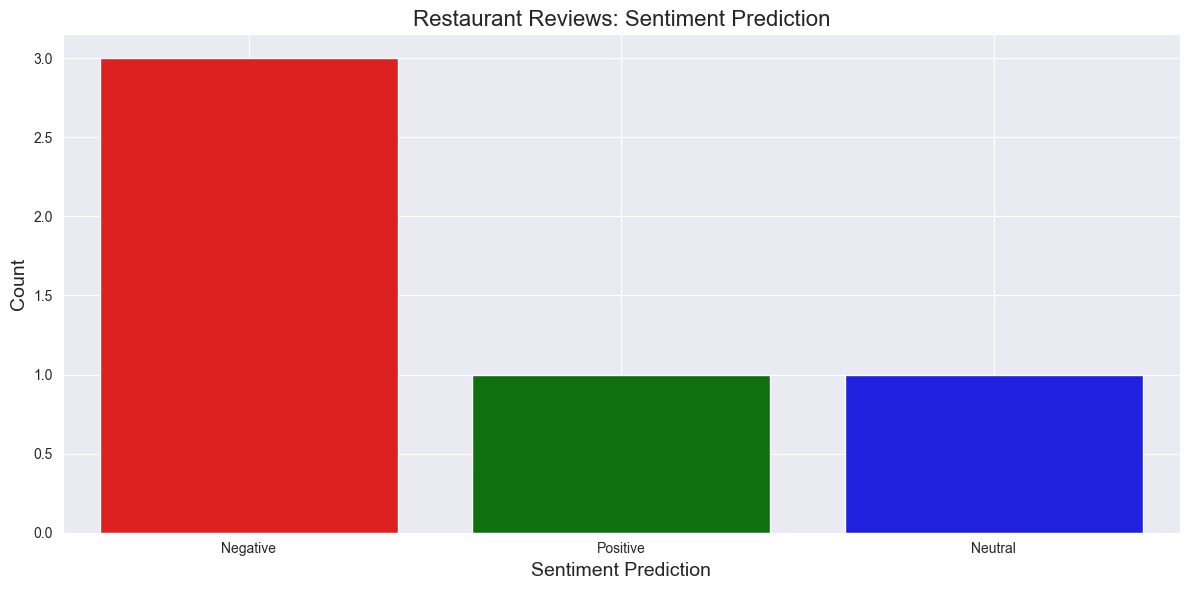

In [115]:
# Unique classes
categories = df_value_counts.Sentiment_Prediction.unique()

# Colors per class
# colors = plt.cm.get_cmap('viridis', len(categories)).colors
colors = {"Negative":"red", "Positive":"green", "Neutral":"blue"}

sns.set_style("darkgrid")
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
sns.barplot(x="Sentiment_Prediction", y="count", data=df_value_counts, ax=axes, palette=colors)

plt.xlabel("Sentiment Prediction", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Restaurant Reviews: Sentiment Prediction", fontsize=16)

# plt.legend(categories)
plt.tight_layout()
plt.grid(True)
plt.show()

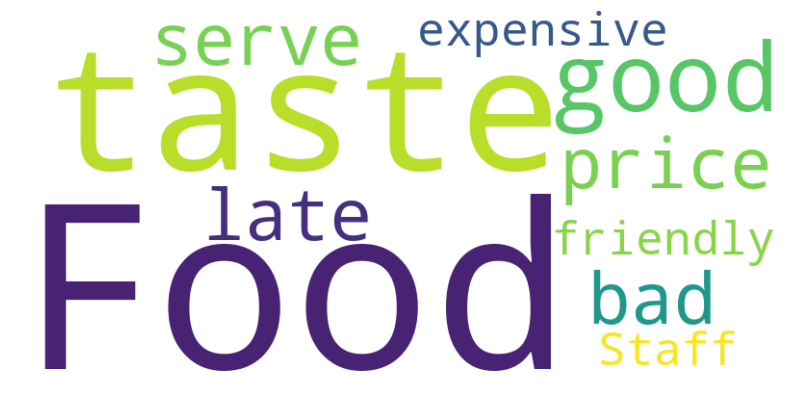

In [122]:
# Combine all lemmatized text into a single string
text = ' '.join(df['Lemmatised_Data'].tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()